In [34]:
import pandas as pd
import numpy as np
import pickle
import math
import random
from statistics import mean
import statistics
from scipy.stats import skew
import math
import networkx as nx
from scipy.linalg import sqrtm
from scipy.signal import butter, lfilter
import scipy.io

In [35]:
#loading continuous data of channels of subject aa
channel = np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/aa/data_set_IVa_aa_cnt.txt")
#loading markers of subject aa
markers= np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/aa/data_set_IVa_aa_mrk.txt")
#loading continuous data of channels of subject al
channel1 = np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/al/data_set_IVa_al_cnt.txt")
#loading markers of subject aa
markers1= np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/al/data_set_IVa_al_mrk.txt")
#loading continuous data of channels of subject av
channel2 = np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/av/data_set_IVa_av_cnt.txt")
#loading markers of subject aa
markers2= np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/av/data_set_IVa_av_mrk.txt")
#loading continuous data of channels of subject aw
channel3 = np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/aw/data_set_IVa_aw_cnt.txt")
#loading markers of subject aa
markers3= np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/aw/data_set_IVa_aw_mrk.txt")
#loading continuous data of channels of subject ay
channel4 = np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/ay/data_set_IVa_ay_cnt.txt")
#loading markers of subject aa
markers4 = np.loadtxt(fname = "/home/shukra/Desktop/MTP/MI Data/Binary class_MI data/ay/data_set_IVa_ay_mrk.txt")

In [36]:
sample_rate = 100
EEG = channel.T
EEG1 = channel1.T
EEG2 = channel2.T
EEG3 = channel3.T
EEG4 = channel4.T
nchannels, nsamples = EEG.shape
nchannels1, nsamples1 = EEG1.shape
nchannels2, nsamples2 = EEG2.shape
nchannels3, nsamples3 = EEG3.shape
nchannels4, nsamples4 = EEG4.shape
# channel names provided in nfo.txt file
channel_names = ['Fp1', 'AFp1', 'Fpz', 'AFp2', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'FAF5', 'FAF1', 'FAF2', 'FAF6', 
                'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FFC7', 'FFC5', 'FFC3', 'FFC1', 'FFC2', 'FFC4', 
                'FFC6', 'FFC8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'CFC7', 
                'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6'
                , 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1',
                'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'PCP7', 'PCP5', 'PCP3', 'PCP1', 'PCP2', 'PCP4', 'PCP6', 'PCP8', 
                'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PPO7', 'PPO5', 'PPO1', 'PPO2', 'PPO6',
                'PPO8', 'PO7', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO8', 'OPO1', 'OPO2', 'O1', 'Oz', 'O2', 'OI1', 'OI2', 
                'I1', 'I2']
# print the shape all cnt.txt file
print(nchannels,nsamples)
print(nchannels1,nsamples1)
print(nchannels2,nsamples2)
print(nchannels3,nsamples3)
print(nchannels4,nsamples4)


118 298458
118 283574
118 283042
118 282838
118 283562


In [37]:
# print(markers.shape)
# event_onsets contains markers of subject while event_code contain the label of that marker
event_onsets = []
event_codes = []
event_onsets1 = []
event_codes1 = []
event_onsets2 = []
event_codes2 = []
event_onsets3 = []
event_codes3 = []
event_onsets4 = []
event_codes4 = []
# print(markers.T[1])
# for loop is written to avoid the markers with label 0
for i in markers:
    if i[1]!=0:
        event_onsets.append(int(i[0]))
        event_codes.append(int(i[1]))
for i in markers1:
    if i[1]!=0:
        event_onsets1.append(int(i[0]))
        event_codes1.append(int(i[1]))
for i in markers2:
    if i[1]!=0:
        event_onsets2.append(int(i[0]))
        event_codes2.append(int(i[1]))
for i in markers3:
    if i[1]!=0:
        event_onsets3.append(int(i[0]))
        event_codes3.append(int(i[1]))
for i in markers4:
    if i[1]!=0:
        event_onsets4.append(int(i[0]))
        event_codes4.append(int(i[1]))
event_onsets=[event_onsets]
event_codes=[event_codes]
event_onsets1=[event_onsets1]
event_codes1=[event_codes1]
event_onsets2=[event_onsets2]
event_codes2=[event_codes2]
event_onsets3=[event_onsets3]
event_codes3=[event_codes3]
event_onsets4=[event_onsets4]
event_codes4=[event_codes4]
# print(event_onsets)
# print(event_codes)

In [38]:
# label size is equal to total time samples in .cnt file
labels = np.zeros((1, nsamples), int)
print(labels)
labels[0,event_onsets] = event_codes
# here label shape would be [1,298458]

labels1 = np.zeros((1, nsamples1), int)
print(labels1)
labels1[0,event_onsets1] = event_codes1


labels2 = np.zeros((1, nsamples2), int)
print(labels2)
labels2[0,event_onsets2] = event_codes2


labels3 = np.zeros((1, nsamples3), int)
print(labels3)
labels3[0,event_onsets3] = event_codes3

labels4 = np.zeros((1, nsamples4), int)
print(labels4)
labels4[0,event_onsets4] = event_codes4


[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [39]:
# binary classification
cl_lab = ['right','foot'] 
cl1 = cl_lab[0]
cl2 = cl_lab[1]
nclasses = len(cl_lab)
nevents = len(event_onsets)
nevents1 = len(event_onsets1)
nevents2 = len(event_onsets2)
nevents3 = len(event_onsets3)
nevents4 = len(event_onsets4)

In [40]:
# Print some information
print('Shape of EEG:', EEG.shape)
print('Shape of EEG1:', EEG1.shape)
print('Shape of EEG2:', EEG2.shape)
print('Shape of EEG3:', EEG3.shape)
print('Shape of EEG4:', EEG4.shape)
print('Sample rate:', sample_rate)
print('Number of channels:', nchannels)
print('Number of channels1:', nchannels1)
print('Number of channels2:', nchannels2)
print('Number of channels3:', nchannels3)
print('Number of channels4:', nchannels4)
print('Channel names:', channel_names)
print('Number of events:', len(event_onsets))
print('Number of events1:', len(event_onsets1))
print('Number of events2:', len(event_onsets2))
print('Number of events3:', len(event_onsets3))
print('Number of events4:', len(event_onsets4))
print('Event codes:', np.unique(event_codes))
print('Class labels:', cl_lab)
print('Number of classes:', nclasses)

Shape of EEG: (118, 298458)
Shape of EEG1: (118, 283574)
Shape of EEG2: (118, 283042)
Shape of EEG3: (118, 282838)
Shape of EEG4: (118, 283562)
Sample rate: 100
Number of channels: 118
Number of channels1: 118
Number of channels2: 118
Number of channels3: 118
Number of channels4: 118
Channel names: ['Fp1', 'AFp1', 'Fpz', 'AFp2', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'FAF5', 'FAF1', 'FAF2', 'FAF6', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FFC7', 'FFC5', 'FFC3', 'FFC1', 'FFC2', 'FFC4', 'FFC6', 'FFC8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'PCP7', 'PCP5', 'PCP3', 'PCP1', 'PCP2', 'PCP4', 'PCP6', 'PCP8', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PPO7', 'PPO5',

In [41]:
# Dictionary to store the trials in, each class gets an entry
trials = {}

# The time window (in samples) to extract for each trial, here 0.5 -- 3.5 seconds first 0.5 data is skipped
win = np.arange(int(0.5*sample_rate), int(3.5*sample_rate))
# win1 = np.arange(int(1.0*sample_rate), int(1.5*sample_rate))
# win2 = np.arange(int(1.5*sample_rate), int(2.0*sample_rate))
# win3 = np.arange(int(2.0*sample_rate), int(2.5*sample_rate))
# win4 = np.arange(int(2.5*sample_rate), int(3.0*sample_rate))

In [42]:
print(len(win))
# print(len(win1))

300


In [43]:

# Length of the time window
nsamples = len(win)

# Loop over the classes (right, foot)
for cl, code in zip(cl_lab, np.unique(event_codes)):
    event_codes = np.array(event_codes)
    event_onsets = np.array(event_onsets)
    event_codes1 = np.array(event_codes1)
    event_onsets1 = np.array(event_onsets1)
    event_codes2 = np.array(event_codes2)
    event_onsets2 = np.array(event_onsets2)
    event_codes3 = np.array(event_codes3)
    event_onsets3 = np.array(event_onsets3)
    event_codes4 = np.array(event_codes4)
    event_onsets4 = np.array(event_onsets4)
    # Extract the onsets for the class
    cl_onsets = event_onsets[event_codes == code]
    cl_onsets1 = event_onsets1[event_codes1 == code]
    cl_onsets2 = event_onsets2[event_codes2 == code]
    cl_onsets3 = event_onsets3[event_codes3 == code]
    cl_onsets4 = event_onsets4[event_codes4 == code]
    print(cl_onsets.shape)
    # Allocate memory for the trials
#     trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets)+len(cl_onsets2)+len(cl_onsets3)+len(cl_onsets4)))
    trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets1)))
    print(trials[cl].shape)
    # Extract each trial
    i=0
    for onset in cl_onsets1:
        trials[cl][:,:,i] = EEG[:, win+onset]
        i+=1
#         trials[cl][:,:,i] = EEG[:, win1+onset]
#         i+=1
#         trials[cl][:,:,i] = EEG[:, win2+onset]
#         i+=1
#         trials[cl][:,:,i] = EEG[:, win3+onset]
#         i+=1
#         trials[cl][:,:,i] = EEG[:, win4+onset]
#         i+=1
#     for onset in cl_onsets1:
#         trials[cl][:,:,i] = EEG[:, win+onset]
#         i+=1
#         trials[cl][:,:,i] = EEG[:, win1+onset]
#         i+=1
#         trials[cl][:,:,i] = EEG[:, win2+onset]
#         i+=1
#         trials[cl][:,:,i] = EEG[:, win3+onset]
#         i+=1
#         trials[cl][:,:,i] = EEG[:, win4+onset]
#         i+=1
#     for onset in cl_onsets2:
#         trials[cl][:,:,i] = EEG[:, win+onset]
#         i+=1
#     for onset in cl_onsets3:
#         trials[cl][:,:,i] = EEG[:, win+onset]
#         i+=1
#     for onset in cl_onsets4:
#         trials[cl][:,:,i] = EEG[:, win+onset]
#         i+=1
  
# Some information about the dimensionality of the data (channels x time x trials)
# print(trials[cl1])
# trials[cl1] will contain all the data with class label 'right'
print('Shape of trials[cl1]:', trials[cl1].shape)
# trials[cl2] will contain all the data with class label 'foot'
print('Shape of trials[cl2]:', trials[cl2].shape)

(80,)
(118, 300, 112)
(88,)
(118, 300, 112)
Shape of trials[cl1]: (118, 300, 112)
Shape of trials[cl2]: (118, 300, 112)


In [44]:
from matplotlib import mlab

def psd(trials):
    '''
    Calculates for each trial the Power Spectral Density (PSD).
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal
    
    Returns
    -------
    trial_PSD : 3d-array (channels x PSD x trials)
        the PSD for each trial.  
    freqs : list of floats
        Yhe frequencies for which the PSD was computed (useful for plotting later)
    '''
    
    ntrials = trials.shape[2]
#     print(ntrials)
    trials_PSD = np.zeros((nchannels, 151, ntrials))

    # Iterate over trials and channels
    for trial in range(ntrials):
        for ch in range(nchannels):
            # Calculate the PSD
            (PSD, freqs) = mlab.psd(trials[ch,:,trial], NFFT=int(nsamples), Fs=sample_rate)
            trials_PSD[ch, :, trial] = PSD.ravel()
                
    return trials_PSD, freqs

In [45]:
# Apply the function
psd_r, freqs = psd(trials[cl1])
psd_f, freqs = psd(trials[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}
print(psd_r.shape)

(118, 151, 112)


In [46]:
import matplotlib.pyplot as plt

def plot_psd(trials_PSD, freqs, chan_ind, chan_lab=None, maxy=None):
    '''
    Plots PSD data calculated with psd().
    
    Parameters
    ----------
    trials : 3d-array
        The PSD data, as returned by psd()
    freqs : list of floats
        The frequencies for which the PSD is defined, as returned by psd() 
    chan_ind : list of integers
        The indices of the channels to plot
    chan_lab : list of strings
        (optional) List of names for each channel
    maxy : float
        (optional) Limit the y-axis to this value
    '''
    plt.figure(figsize=(12,5))
    
    nchans = len(chan_ind)
    
    # Maximum of 3 plots per row
    nrows = np.ceil(nchans / 3)
    ncols = min(3, nchans)
    
    # Enumerate over the channels
    for i,ch in enumerate(chan_ind):
        # Figure out which subplot to draw to
        plt.subplot(nrows,ncols,i+1)
    
        # Plot the PSD for each class
        for cl in trials.keys():
            plt.plot(freqs, np.mean(trials_PSD[cl][ch,:,:], axis=1), label=cl)
    
        # All plot decoration below...
        
        plt.xlim(1,30)
        
        if maxy != None:
            plt.ylim(0,maxy)
    
        plt.grid()
    
        plt.xlabel('Frequency (Hz)')
        
        if chan_lab == None:
            plt.title('Channel %d' % (ch+1))
        else:
            plt.title(chan_lab[i])

        plt.legend()
        
    plt.tight_layout()

/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


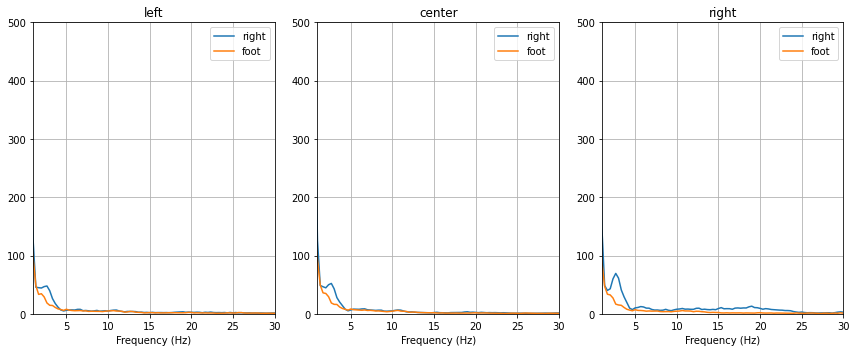

In [47]:
plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],
    chan_lab=['left', 'center', 'right'],
    maxy=500
)

In [48]:
import scipy.signal 

def bandpass(trials, lo, hi, sample_rate):
    '''
    Designs and applies a bandpass filter to the signal.
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEGsignal
    lo : float
        Lower frequency bound (in Hz)
    hi : float
        Upper frequency bound (in Hz)
    sample_rate : float
        Sample rate of the signal (in Hz)
    
    Returns
    -------
    trials_filt : 3d-array (channels x samples x trials)
        The bandpassed signal
    '''

    # The iirfilter() function takes the filter order: higher numbers mean a sharper frequency cutoff,
    # but the resulting signal might be shifted in time, lower numbers mean a soft frequency cutoff,
    # but the resulting signal less distorted in time. It also takes the lower and upper frequency bounds
    # to pass, divided by the niquist frequency, which is the sample rate divided by 2:
    a, b = scipy.signal.iirfilter(6, [lo/(sample_rate/2.0), hi/(sample_rate/2.0)])

    # Applying the filter to each trial
    ntrials = trials.shape[2]
    trials_filt = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_filt[:,:,i] = scipy.signal.filtfilt(a, b, trials[:,:,i], axis=1)
    
    return trials_filt

In [49]:
# Apply the function
trials_filt = {cl1: bandpass(trials[cl1], 8, 15, sample_rate),
               cl2: bandpass(trials[cl2], 8, 15, sample_rate)}

/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


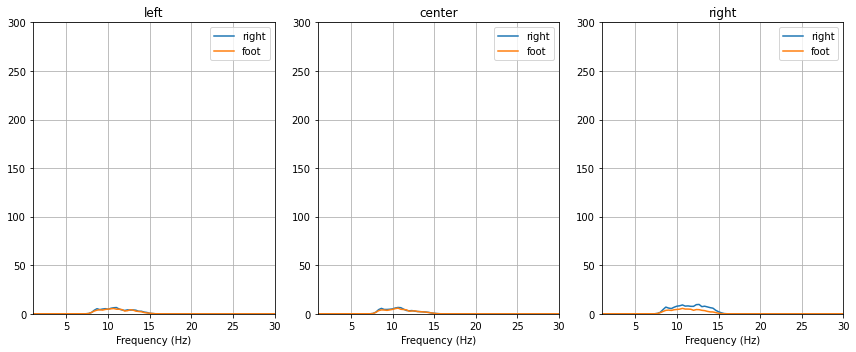

In [50]:
psd_r, freqs = psd(trials_filt[cl1])
psd_f, freqs = psd(trials_filt[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],
    chan_lab=['left', 'center', 'right'],
    maxy=300
)

In [51]:
# Calculate the log(var) of the trials
def logvar(trials):
    '''
    Calculate the log-var of each channel.
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal.
        
    Returns
    -------
    logvar - 2d-array (channels x trials)
        For each channel the logvar of the signal
    '''
#     print(np.log(np.var(trials[0], axis=1)).shape)
    return np.log(np.var(trials, axis=1))

In [52]:
# Apply the function
trials_logvar = {cl1: logvar(trials_filt[cl1]),
                 cl2: logvar(trials_filt[cl2])}
print(trials_logvar['right'].shape)

(118, 112)


In [53]:
def plot_logvar(trials):
    '''
    Plots the log-var of each channel/component.
    arguments:
        trials - Dictionary containing the trials (log-vars x trials) for 2 classes.
    '''
    plt.figure(figsize=(12,5))
    
    x0 = np.arange(nchannels)
    x1 = np.arange(nchannels) + 0.4

    y0 = np.mean(trials[cl1], axis=1)
    y1 = np.mean(trials[cl2], axis=1)

    plt.bar(x0, y0, width=0.5, color='b')
    plt.bar(x1, y1, width=0.4, color='r')

    plt.xlim(-0.5, nchannels+0.5)

    plt.gca().yaxis.grid(True)
    plt.title('log-var of each channel/component')
    plt.xlabel('channels/components')
    plt.ylabel('log-var')
    plt.legend(cl_lab)

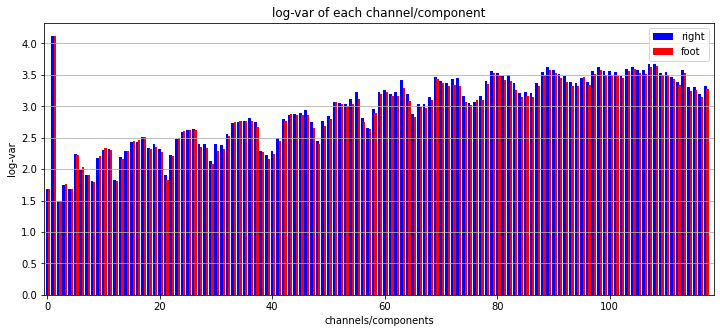

In [54]:
# Plot the log-vars
plot_logvar(trials_logvar)

In [55]:
from numpy import linalg

def cov(trials):
    ''' Calculate the covariance for each trial and return their average '''
    ntrials = trials.shape[2]
    covs = [ trials[:,:,i].dot(trials[:,:,i].T) / nsamples for i in range(ntrials) ]
    return np.mean(covs, axis=0)

def whitening(sigma):
    ''' Calculate a whitening matrix for covariance matrix sigma. '''
    U, l, _ = linalg.svd(sigma)
    return U.dot( np.diag(l ** -0.5) )

def csp(trials_r, trials_f):
    '''
    Calculate the CSP transformation matrix W.
    arguments:
        trials_r - Array (channels x samples x trials) containing right hand movement trials
        trials_f - Array (channels x samples x trials) containing foot movement trials
    returns:
        Mixing matrix W
    '''
    cov_r = cov(trials_r)
#     print(cov_r)
    cov_f = cov(trials_f)
    P = whitening(cov_r + cov_f)
    B, _, _ = linalg.svd( P.T.dot(cov_f).dot(P) )
    W = P.dot(B)
    return W

def apply_mix(W, trials):
    ''' Apply a mixing matrix to each trial (basically multiply W with the EEG signal matrix)'''
    ntrials = trials.shape[2]
    trials_csp = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_csp[:,:,i] = W.T.dot(trials[:,:,i])
    return trials_csp

In [56]:
# Apply the functions
W = csp(trials_filt[cl1], trials_filt[cl2])
trials_csp = {cl1: apply_mix(W, trials_filt[cl1]),
              cl2: apply_mix(W, trials_filt[cl2])}


In [57]:
ntrials1 = trials_csp[cl1].shape[2]
ntrials2 = trials_csp[cl2].shape[2]
print(ntrials1)
print(ntrials2)
output_bp_csp = np.zeros((30, nsamples, ntrials1+ntrials2))
print(output_bp_csp.shape)
channels_selected = ['FC2', 'FC4', 'FC6', 'CFC2', 'CFC4','CFC6', 'C2', 'C4', 'C6', 'CCP2', 'CCP4', 'CCP6', 'CP2', 'CP4', 'CP6', 'FC5', 'FC3', 'FC1', 'CFC5', 'CFC3', 'CFC1', 'C5',
'C3', 'C1', 'CCP5', 'CCP3', 'CCP1', 'CP5', 'CP3', 'CP1']

# for creating one file per person per trial
y_list=[]
j=0
for i in range(trials_csp[cl1].shape[2]):
    single = trials_csp[cl1][:,:,i].T
    df = pd.DataFrame(data=single,columns=channel_names)
    df=df[channels_selected].T
    a = np.array(df)
    print(a.shape)
    output_bp_csp[:,:,j]=a
    
#     np.savetxt("/home/shukra/Desktop/MTP/MI Data/PLI_input/ay/Data/a"+str(j)+".csv", a, delimiter = ",")
    j+=1
    y_list.append(0)
for i in range(trials_csp[cl2].shape[2]):
    single = trials_csp[cl2][:,:,i].T
#     print(single.shape)
    df = pd.DataFrame(data=single,columns=channel_names)
#     print(df)
    df=df[channels_selected].T
#     print(df.shape)
    a = np.array(df)
#     print(a.shape)
#     np.savetxt("/home/shukra/Desktop/MTP/MI Data/PLI_input/ay/Data/ay"+str(j)+".csv", a, delimiter = ",")
    output_bp_csp[:,:,j]=a
    j+=1
    y_list.append(1)
 

# np.array(y_list).tofile('/home/shukra/Desktop/MTP/MI Data/PLI_input/ay/Label/ay'+'.csv', sep = ',')
print(j)
print(len(y_list))
print(output_bp_csp.shape)
f = open("Bandpass+CSP_ay", "wb")
pickle.dump(output_bp_csp, f)
f.close()
f = open("Bandpass+CSP_ay_label", "wb")
pickle.dump(y_list, f)
f.close()

112
112
(30, 300, 224)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 300)
(30, 30

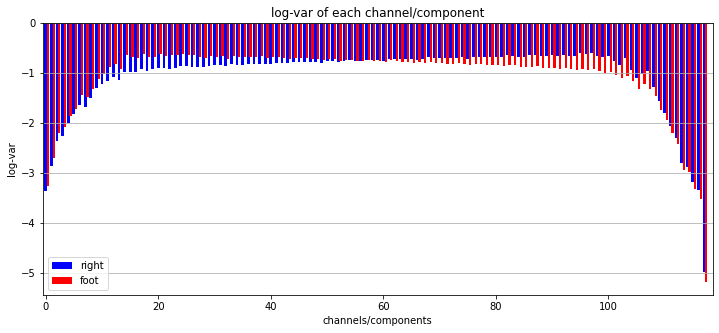

In [58]:
trials_logvar = {cl1: logvar(trials_csp[cl1]),
                 cl2: logvar(trials_csp[cl2])}
plot_logvar(trials_logvar)

/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


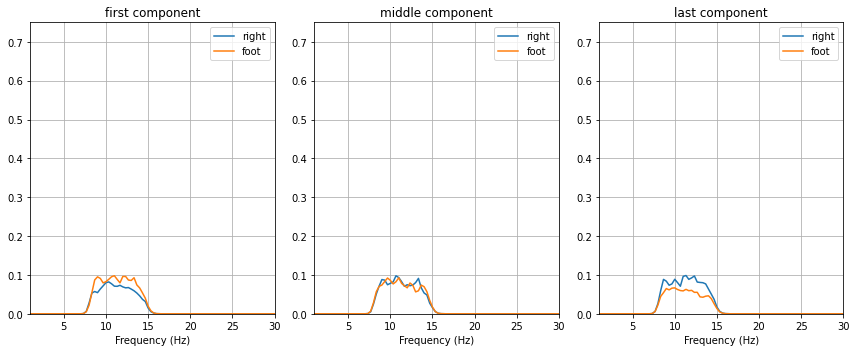

In [59]:
psd_r, freqs = psd(trials_csp[cl1])
psd_f, freqs = psd(trials_csp[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

plot_psd(trials_PSD, freqs, [20,58,-20], chan_lab=['first component', 'middle component', 'last component'], maxy=0.75 )


In [60]:
def plot_scatter(left, foot):
    plt.figure()
    plt.scatter(left[15,:], left[-15,:], color='b')
    plt.scatter(foot[15,:], foot[-15,:], color='r')
    plt.xlabel('Last component')
    plt.ylabel('First component')
    plt.legend(cl_lab)

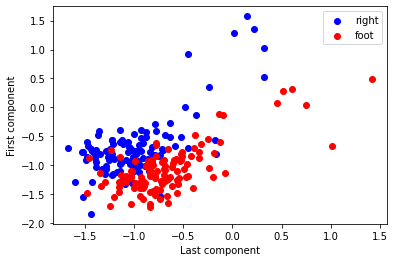

In [61]:
plot_scatter(trials_logvar[cl1], trials_logvar[cl2])


In [62]:
# Percentage of trials to use for training (50-50 split here)
train_percentage = 0.8

# Calculate the number of trials for each class the above percentage boils down to
ntrain_r = int(trials_filt[cl1].shape[2] * train_percentage)
ntrain_f = int(trials_filt[cl2].shape[2] * train_percentage)
ntest_r = trials_filt[cl1].shape[2] - ntrain_r
ntest_f = trials_filt[cl2].shape[2] - ntrain_f

# Splitting the frequency filtered signal into a train and test set
train = {cl1: trials_filt[cl1][:,:,:ntrain_r],
         cl2: trials_filt[cl2][:,:,:ntrain_f]}

test = {cl1: trials_filt[cl1][:,:,ntrain_r:],
        cl2: trials_filt[cl2][:,:,ntrain_f:]}

# Train the CSP on the training set only
W = csp(train[cl1], train[cl2])

# Apply the CSP on both the training and test set
train[cl1] = apply_mix(W, train[cl1])
train[cl2] = apply_mix(W, train[cl2])
test[cl1] = apply_mix(W, test[cl1])
test[cl2] = apply_mix(W, test[cl2])

In [63]:
print(train[cl1].shape)

(118, 300, 89)


In [64]:
# channels_selected = ['FC2', 'FC4', 'FC6', 'CFC2', 'CFC4','CFC6', 'C2', 'C4', 'C6', 'CCP2', 'CCP4', 'CCP6', 'CP2', 'CP4', 'CP6', 'FC5', 'FC3', 'FC1', 'CFC5', 'CFC3', 'CFC1', 'C5',
# 'C3', 'C1', 'CCP5', 'CCP3', 'CCP1', 'CP5', 'CP3', 'CP1']
channels_selected = ['C3', 'Cz', 'C4']
ntrials = trials_csp[cl1].shape[2]
input_list=[]
tmp=0
for i in range(ntrials):
    data = trials_csp[cl1][:,:,i].T
    df = pd.DataFrame(data=data,columns=channel_names)
    pearsonCorrelation={}
    #adJMatrix=[]
    for i in channels_selected:
        #matrix_list=[]
        for j in channels_selected:
            x=df[i]
            x_t=np.array(x).T
            y=df[j]
            y_t=np.array(y).T
            r=np.corrcoef(x_t,y_t)
            pearsonCorrelation[(i,j)]=r[0,1]
    partialCorrelation=dict()
    # adJMatrix is to store the Ajencency matrix
    adJMatrix=[]
    features_total=[]
    for i in channels_selected:
        matrix_list=[]
        features=[]
        features.append(mean(df[i]))
        features.append(statistics.median(df[i]))
        features.append(np.std(np.array(df[i]).T, dtype = np.float64))
        features.append(skew(df[i]))
        features_total.append(features)
        for j in channels_selected:
            list=[]
            i_j=pearsonCorrelation[(i,j)]
            for k in channels_selected:
                if k is not i and k is not j:
                    j_k=pearsonCorrelation[(j,k)]
                    i_k=pearsonCorrelation[(i,k)]
                    partial_corr=((i_j-(j_k*i_k))/math.sqrt((1-i_k*i_k)*(1-j_k*j_k)))
                    list.append(partial_corr)
            if min(list)>0.3:
                partialCorrelation[(i,j)]=min(list)
                matrix_list.append(1)
            else:
                partialCorrelation[(i,j)]=0
                matrix_list.append(0)
        adJMatrix.append(matrix_list)
    input_list.append([adJMatrix, 0,features_total])
    print(tmp)
    tmp+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


In [65]:
ntrials = trials_csp[cl2].shape[2]
for i in range(ntrials):
    data = trials_csp[cl2][:,:,i].T
    df = pd.DataFrame(data=data,columns=channel_names)
    pearsonCorrelation={}
    #adJMatrix=[]
    for i in channels_selected:
        #matrix_list=[]
        for j in channels_selected:
            x=df[i]
            x_t=np.array(x).T
            y=df[j]
            y_t=np.array(y).T
            r=np.corrcoef(x_t,y_t)
            pearsonCorrelation[(i,j)]=r[0,1]
    partialCorrelation=dict()
    # adJMatrix is to store the Ajencency matrix
    adJMatrix=[]
    features_total=[]
    for i in channels_selected:
        matrix_list=[]
        features=[]
        features.append(mean(df[i]))
        features.append(statistics.median(df[i]))
        features.append(np.std(np.array(df[i]).T, dtype = np.float64))
        features.append(skew(df[i]))
        features_total.append(features)
        for j in channels_selected:
            list=[]
            i_j=pearsonCorrelation[(i,j)]
            for k in channels_selected:
                if k is not i and k is not j:
                    j_k=pearsonCorrelation[(j,k)]
                    i_k=pearsonCorrelation[(i,k)]
                    partial_corr=((i_j-(j_k*i_k))/math.sqrt((1-i_k*i_k)*(1-j_k*j_k)))
                    list.append(partial_corr)
            if min(list)>0.3:
                partialCorrelation[(i,j)]=min(list)
                matrix_list.append(1)
            else:
                partialCorrelation[(i,j)]=0
                matrix_list.append(0)
        adJMatrix.append(matrix_list)
    input_list.append([adJMatrix, 1,features_total])
    print(tmp)
    tmp+=1

112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223


In [66]:
f = open("Bandpass+CSP+GNN_al", "wb")
random.shuffle(input_list)
pickle.dump(input_list, f)
f.close()

In [67]:
print(np.array(input_list[0][0]).shape)

(3, 3)
